In [1]:
# NBVAL_IGNORE_OUTPUT
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
IPythonConsole.molSize = (350,300)
IPythonConsole.drawOptions.centreMoleculesBeforeDrawing=True
from rdkit import RDLogger
# in case the RGD code is verbose (should only happen pre-release)
RDLogger.DisableLog('rdApp.debug')
import rdkit
print(rdkit.__version__)

2021.03.1dev1


In [2]:
from rdkit.Chem import rdRGroupDecomposition
import json

In [3]:
ms = [x for x in Chem.SDMolSupplier('./simple1.sdf')]
len(ms)

4

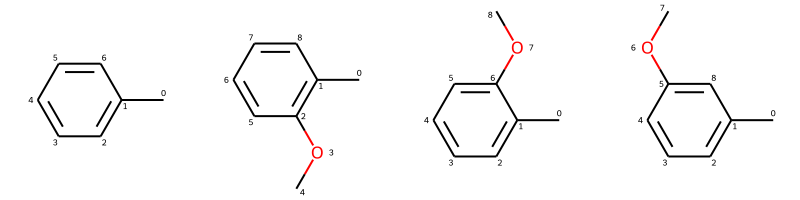

In [4]:
# NBVAL_SKIP
IPythonConsole.drawOptions.addAtomIndices = True
Draw.MolsToGridImage(ms,molsPerRow=4)

In [5]:
res,_ = rdRGroupDecomposition.RGroupDecompose([ms[0]],ms[1:],asSmiles=True)
for row in res:
    print(f'  {row}')

  {'Core': 'Cc1cccc([*:2])c1[*:1]', 'R1': 'CO[*:1]', 'R2': '[H][*:2]'}
  {'Core': 'Cc1cccc([*:2])c1[*:1]', 'R1': 'CO[*:1]', 'R2': '[H][*:2]'}
  {'Core': 'Cc1cccc([*:2])c1[*:1]', 'R1': '[H][*:1]', 'R2': 'CO[*:2]'}


In [6]:
# testing against reference data:
with open('./simple1.out1.json','rt') as inf:
    expected = json.load(inf)
if expected != res:
    raise ValueError(f"MISMATCH:\n{res}\n   !=\n{expected}")

In [7]:
ps = rdRGroupDecomposition.RGroupDecompositionParameters()
ps.matchingStrategy = rdRGroupDecomposition.RGroupMatching.NoSymmetrization
res,_ = rdRGroupDecomposition.RGroupDecompose([ms[0]],ms[1:],asSmiles=True,options=ps)
for row in res:
    print(f'  {row}')

  {'Core': 'Cc1c([*:3])ccc([*:2])c1[*:1]', 'R1': '[H][*:1]', 'R2': '[H][*:2]', 'R3': 'CO[*:3]'}
  {'Core': 'Cc1c([*:3])ccc([*:2])c1[*:1]', 'R1': 'CO[*:1]', 'R2': '[H][*:2]', 'R3': '[H][*:3]'}
  {'Core': 'Cc1c([*:3])ccc([*:2])c1[*:1]', 'R1': '[H][*:1]', 'R2': 'CO[*:2]', 'R3': '[H][*:3]'}


In [8]:
# testing against reference data:
with open('./simple1.out2.json','rt') as inf:
    expected = json.load(inf)
if expected != res:
    raise ValueError(f"MISMATCH:\n{res}\n   !=\n{expected}")